In [1]:
%reload_kedro

2023-07-19 19:04:33,648 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/crypto_msc_thesis
2023-07-19 19:04:34,437 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-07-19 19:04:35,257 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-07-19 19:04:35,259 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2023-07-19 19:04:35,270 - kedro.extras.extensions.ipython - INFO - Registered line magic `run_viz`


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import seaborn as sns

## XGBoost

### Operations Profit over Time

In [4]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

2023-07-19 19:04:47,506 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [5]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

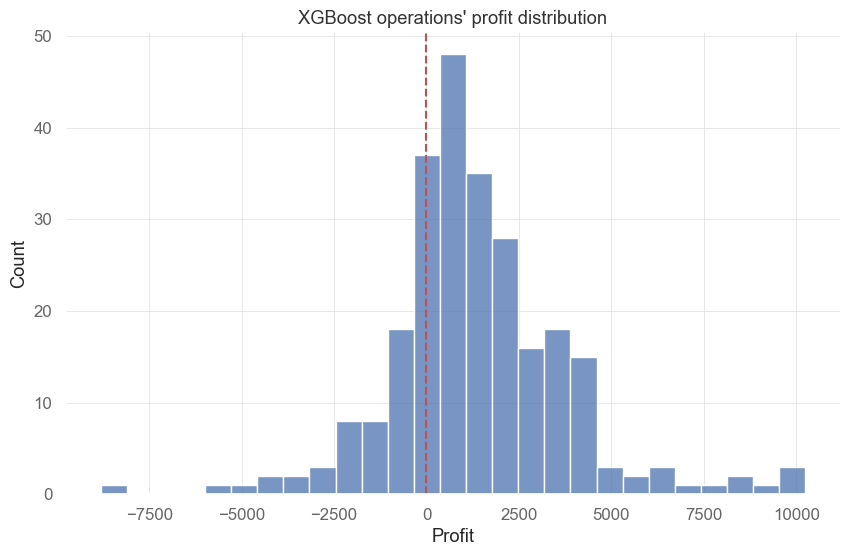

In [9]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="XGBoost operations' profit distribution")

plt.axvline(x=0, color="r", ls="--")

plt.savefig("/Users/gpalazzo/Desktop/fig_xgboost_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

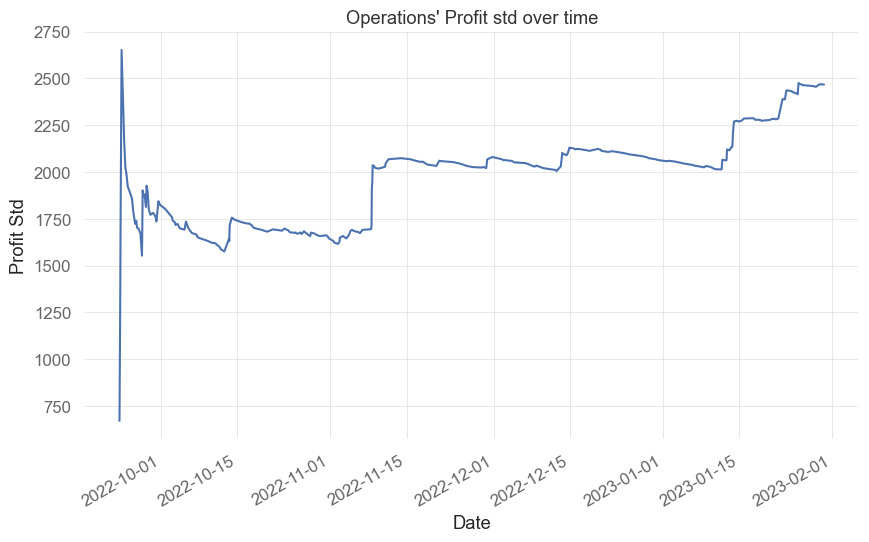

In [10]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

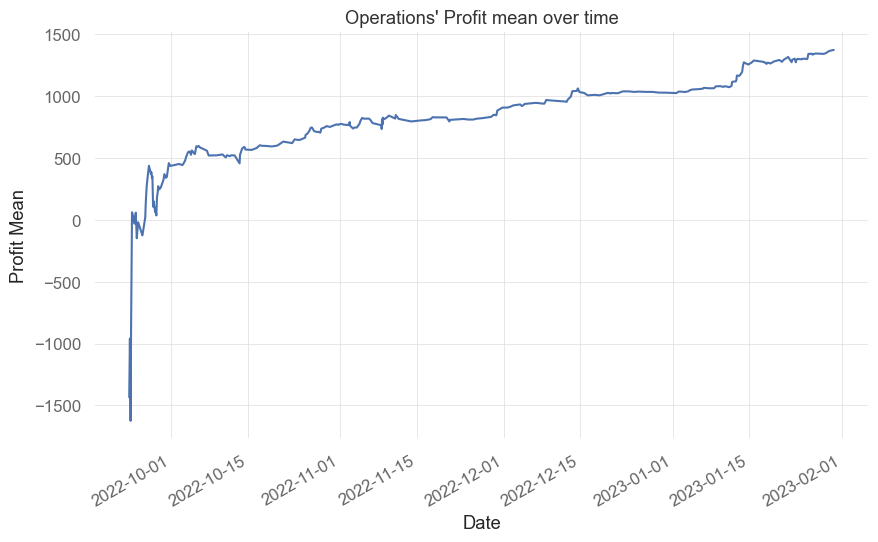

In [11]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LSTM

### Operations Profit over Time

In [12]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

2023-07-19 19:09:24,735 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [13]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

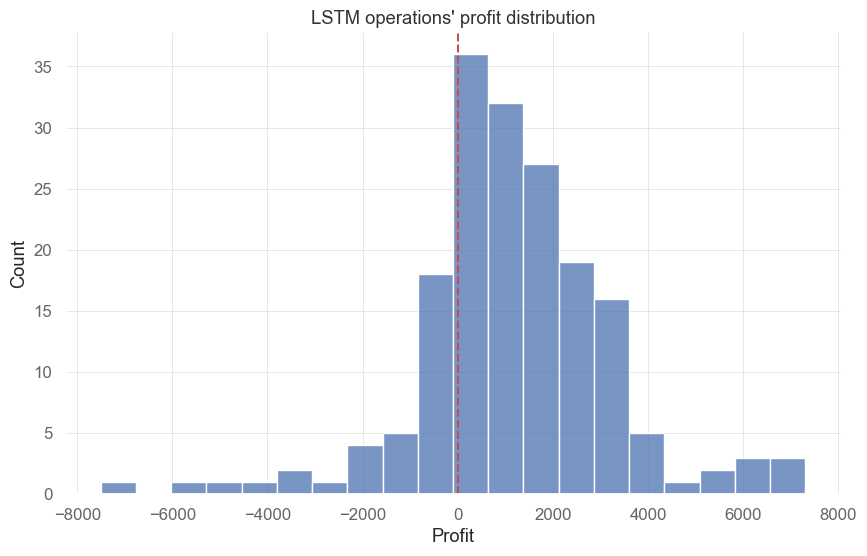

In [14]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LSTM operations' profit distribution")

plt.axvline(x=0, color="r", ls="--")

plt.savefig("/Users/gpalazzo/Desktop/fig_lstm_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

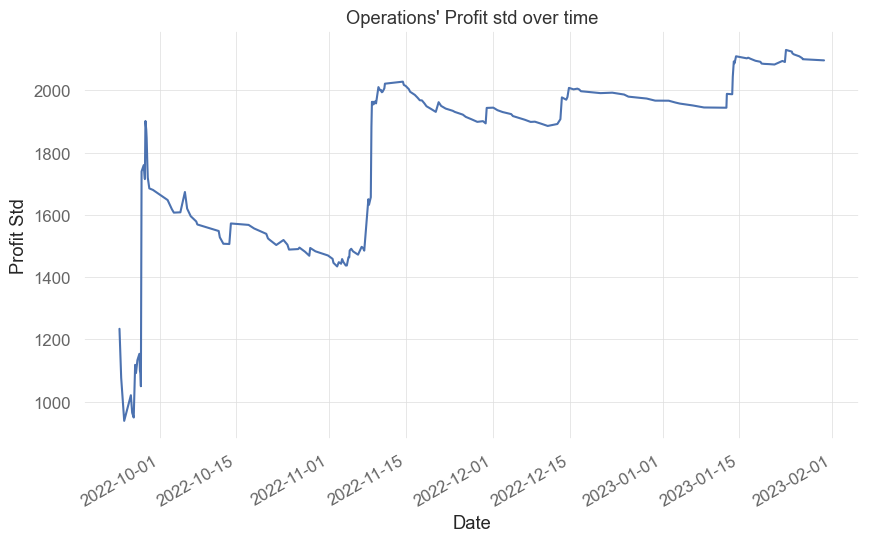

In [15]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

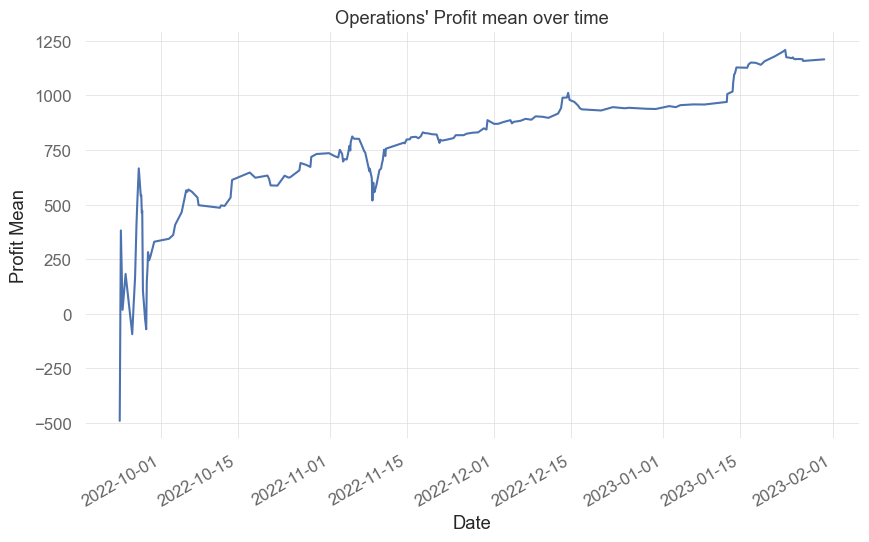

In [16]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LogReg

### Operations Profit over Time

In [17]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

2023-07-19 19:09:37,680 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [18]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

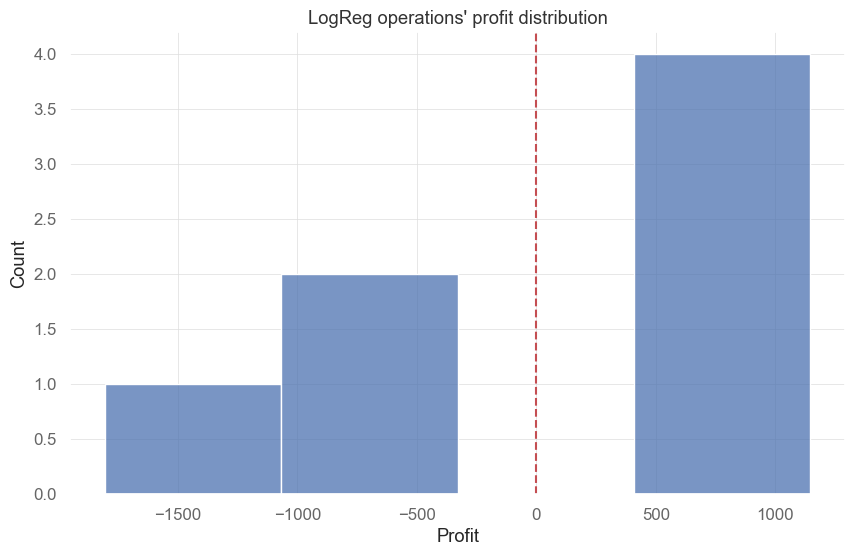

In [19]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LogReg operations' profit distribution")

plt.axvline(x=0, color="r", ls="--")

plt.savefig("/Users/gpalazzo/Desktop/fig_logreg_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

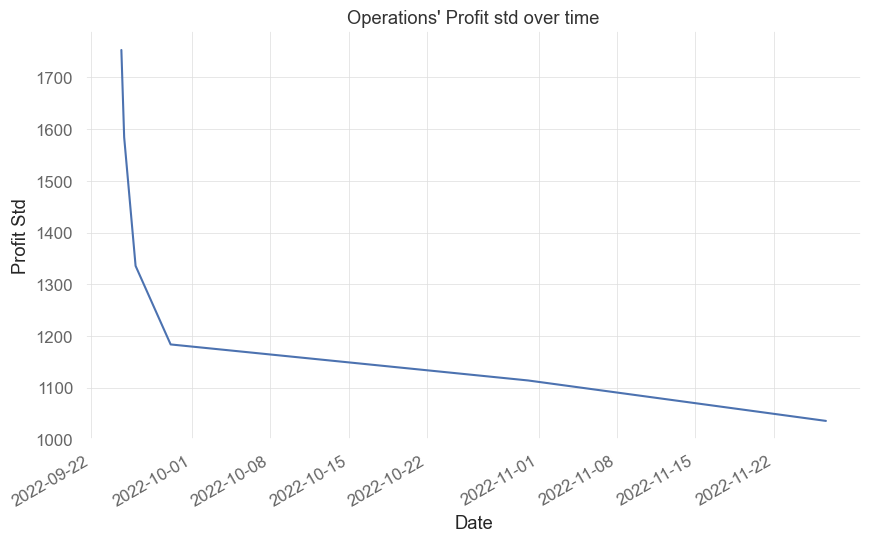

In [20]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

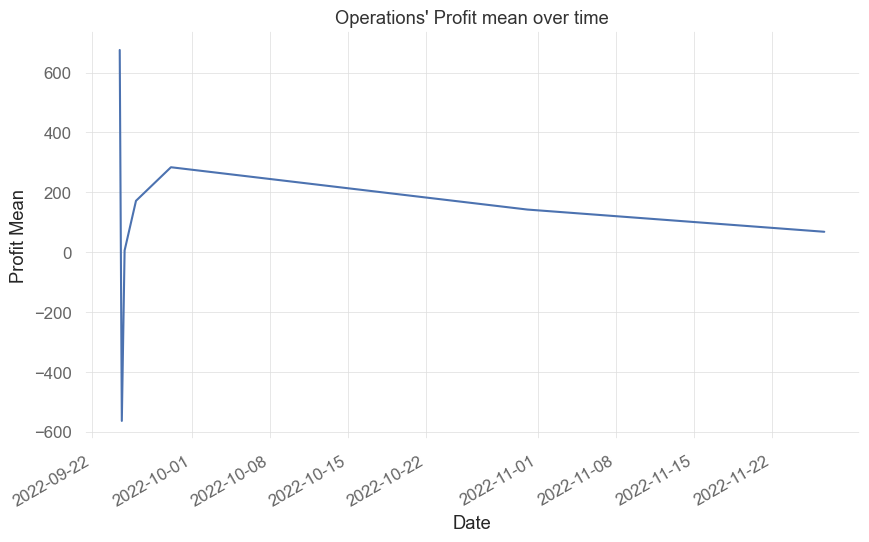

In [21]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## Benchmark

In [22]:
df_portf_pnl_benchmark = catalog.load("benchmark_trendfollowing_pnl")

df_portf_pnl_benchmark.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl_benchmark["pctchg_pos"])

df_portf_pnl_benchmark = df_portf_pnl_benchmark[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_portf_pnl_benchmark.loc[:, "logret_accum"] = df_portf_pnl_benchmark["logret_pos"].cumsum()
df_portf_pnl_benchmark.loc[:, "pctchg_accum"] = np.exp(df_portf_pnl_benchmark["logret_accum"]) - 1

df_portf_pnl_benchmark = df_portf_pnl_benchmark[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos_benchmark",
                                   "pctchg_accum": "portf_pctchg_accum_benchmark"})

df_portf_pnl_benchmark.index = pd.to_datetime(df_portf_pnl_benchmark.index)

2023-07-19 19:09:54,190 - kedro.io.data_catalog - INFO - Loading data from `benchmark_trendfollowing_pnl` (ParquetDataSet)...


## XGBoost

### Portfolio overall metrics - Part 1

In [23]:
df_portf_metr = catalog.load("xgboost_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "xgboost"
df_portf_metr

2023-07-19 19:10:04,849 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,352307.945782,32,4,xgboost


### Portfolio overall metrics - Part 2

In [24]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

xgboost = df_logret.copy()

2023-07-19 19:10:06,220 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [25]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   234.87%
CAGR﹪              2955.82%

Sharpe              10.1
Prob. Sharpe Ratio  100.0%
Sortino             21.51
Sortino/√2          15.21
Omega               4.4

Max Drawdown        -4.14%
Longest DD Days     6

Gain/Pain Ratio     16.19
Gain/Pain (1M)      -

Payoff Ratio        1.12
Profit Factor       4.4
Common Sense Ratio  9.75
CPC Index           3.93
Tail Ratio          2.21
Outlier Win Ratio   3.66
Outlier Loss Ratio  2.8

MTD                 44.88%
3M                  125.61%
6M                  234.87%
YTD                 44.88%
1Y                  234.87%
3Y (ann.)           2955.82%
5Y (ann.)           2955.82%
10Y (ann.)          2955.82%
All-time (ann.)     2955.82%

Avg. Drawdown       -0.97%
Avg. Drawdown Days  1
Recovery Factor     56.74
Ulcer Index         0.01
Serenity In

## LSTM

### Portfolio overall metrics - Part 1

In [26]:
df_portf_metr = catalog.load("lstm_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "lstm"
df_portf_metr

2023-07-19 19:10:07,786 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,207460.428976,23,4,lstm


### Portfolio overall metrics - Part 2

In [27]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

lstm = df_logret.copy()

2023-07-19 19:10:08,238 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [28]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   138.31%
CAGR﹪              1067.07%

Sharpe              10.02
Prob. Sharpe Ratio  100.0%
Sortino             18.36
Sortino/√2          12.98
Omega               4.29

Max Drawdown        -7.69%
Longest DD Days     15

Gain/Pain Ratio     7.8
Gain/Pain (1M)      -

Payoff Ratio        1.13
Profit Factor       4.29
Common Sense Ratio  9.67
CPC Index           3.83
Tail Ratio          2.25
Outlier Win Ratio   3.23
Outlier Loss Ratio  3.98

MTD                 24.17%
3M                  87.9%
6M                  138.31%
YTD                 24.17%
1Y                  138.31%
3Y (ann.)           1067.07%
5Y (ann.)           1067.07%
10Y (ann.)          1067.07%
All-time (ann.)     1067.07%

Avg. Drawdown       -1.5%
Avg. Drawdown Days  3
Recovery Factor     17.97
Ulcer Index         0.01
Serenity In

## LogReg

### Portfolio overall metrics - Part 1

In [29]:
df_portf_metr = catalog.load("logreg_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "LogReg"
df_portf_metr

2023-07-19 19:10:09,164 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,475.233735,3,2,LogReg


### Portfolio overall metrics - Part 2

In [30]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

logreg = df_logret.copy()

2023-07-19 19:10:09,628 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [31]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-24
End Period          2022-11-26
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   0.32%
CAGR﹪              1.85%

Sharpe              1.3
Prob. Sharpe Ratio  56.45%
Sortino             1.85
Sortino/√2          1.31
Omega               1.18

Max Drawdown        -1.2%
Longest DD Days     26

Gain/Pain Ratio     0.53
Gain/Pain (1M)      0.53

Payoff Ratio        0.89
Profit Factor       1.18
Common Sense Ratio  0.85
CPC Index           0.6
Tail Ratio          0.72
Outlier Win Ratio   1.4
Outlier Loss Ratio  1.89

MTD                 -0.25%
3M                  0.32%
6M                  0.32%
YTD                 0.32%
1Y                  0.32%
3Y (ann.)           1.85%
5Y (ann.)           1.85%
10Y (ann.)          1.85%
All-time (ann.)     1.85%

Avg. Drawdown       -0.91%
Avg. Drawdown Days  14
Recovery Factor     0.26
Ulcer Index         0.01
Serenity Index      0.33


## Cumulative Returns

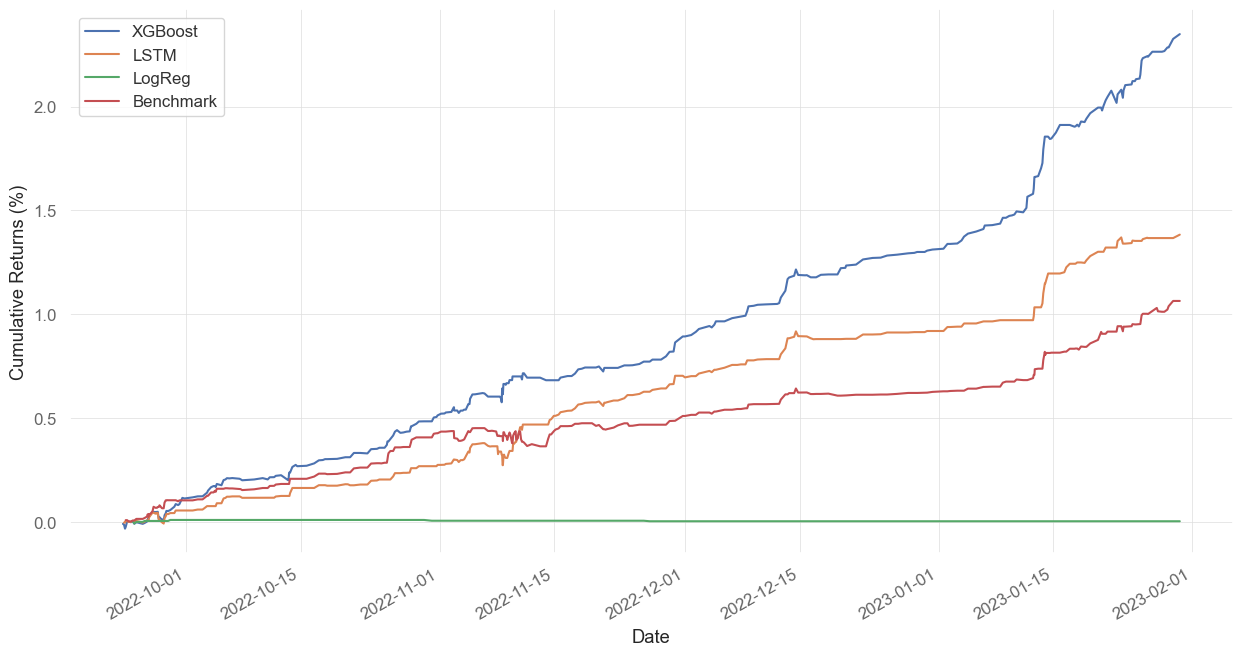

In [32]:
df = xgboost[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "XGBoost"}) \
        .merge(lstm[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "LSTM"}), 
               left_index=True, 
               right_index=True, 
               how="outer") \
        .merge(logreg[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "LogReg"}), 
               left_index=True, 
               right_index=True, 
               how="outer") \
        .merge(df_portf_pnl_benchmark[["portf_pctchg_accum_benchmark"]] \
                       .rename(columns={"portf_pctchg_accum_benchmark": "Benchmark"}), 
               left_index=True, 
               right_index=True, 
               how="outer")

plot = df.ffill().plot(figsize=(15, 8))

plt.xlabel("Date")
plt.ylabel("Cumulative Returns (%)")

fig = plot.get_figure()
fig.savefig("/Users/gpalazzo/Desktop/fig_portfolios_vs_benchmk_rets.png")